In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.9


In [2]:
# Teste watermark no visual studio
import watermark
print("Watermark instalado corretamente.")


Watermark instalado corretamente.


In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys, os
warnings.filterwarnings("ignore")

In [4]:
# Adicionando o caminho para os módulos Python
sys.path.append(os.path.abspath(os.path.join('modulos')))
from estrategia1 import *     # contém detalhes para tratamento de valores ausentes
from estrategia2 import *
from estrategia3 import *

In [5]:
# Configurando para o pandas o número máximo de colunos a serem mostradas
pd.set_option('display.max_columns', 100)

In [6]:
# Versão dos pacotes usados neste jupyter
%reload_ext watermark
%watermark -a 'DSA' --iversions

Author: DSA

seaborn   : 0.12.2
pandas    : 1.5.3
matplotlib: 3.7.0
watermark : 2.4.3
sys       : 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
numpy     : 1.23.5



### Carregando os dados

In [14]:
# Carregando o dataset
dataset = pd.read_csv('dados/dataset.csv')

In [15]:
# Shape
dataset.shape

(45211, 19)

In [16]:
# Amostra
dataset.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### Análise Exploratória

In [17]:
# Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [18]:
# Verifica o percentual de valores ausentes
# Função do módulo estratégia 1
func_calc_percentual_valores_ausentes(dataset)

O dataset tem 0.01 % de valores ausentes.


In [19]:
# Cria tabela com valores ausentes
df_missing = func_calc_percentual_valores_ausentes_coluna(dataset)

O dataset tem 19 colunas.
Encontrado: 4 colunas que têm valores ausentes.


In [27]:
# Temos valores nulos? Sim ou Não?
dataset.isna().any()

age          True
salary       True
balance     False
marital     False
jobedu      False
targeted    False
default     False
housing     False
loan        False
contact     False
day         False
month        True
duration    False
campaign    False
pdays       False
previous    False
poutcome    False
response     True
dtype: bool

In [28]:
# Temos valores nulos? Quantos?
dataset.isna().sum()

age         20
salary      26
balance      0
marital      0
jobedu       0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
dtype: int64

In [26]:
# Não usaremos a coluna ID. Vamos removê-la.
dataset.drop(['customerid'], axis = 1, inplace=True)

KeyError: "['customerid'] not found in axis"

In [29]:
# Colunas existentes
dataset.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

Sugestão de Exercício(1): A coluna "jobedu" parece ter duas informações. Vamos separar em duas colunas.

In [31]:
# Tentativa durval
dataset['jobedu'].str.split(',', expand=True)

,0,1
0,management,tertiary
1,technician,secondary
2,entrepreneur,secondary
3,blue-collar,unknown
4,unknown,unknown
...,...,...
45206,technician,tertiary
45207,retired,primary
45208,retired,secondary
45209,blue-collar,secondary


In [33]:
# Correção com o professor
# Fazemos o split da coluna jobedu e criamos a coluna job com o primeiro elemento antes da vírgula
dataset['job'] = dataset['jobedu'].apply(lambda x:x.split(",")[0])

forma de ler a função lambda(anônima) acima:
o método .applay entra numa espécie de lupe, vai repetir uma coluna
-> pegue o valor de x e faça o split pela vírgula
-> retorne o valor de x no índice [0]

In [34]:
dataset.head(1)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management


In [35]:
# Fazemos o split da coluna jobedu e criamos a coluna education com o segundo elemento antes da vírgula
dataset['education'] = dataset['jobedu'].apply(lambda x:x.split(",")[1])

In [36]:
dataset.head(1)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary


In [37]:
# Drop da coluna "jobedu"
dataset.drop(('jobedu'), axis=1, inplace=True)

In [38]:
dataset.head(1)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary


## Tratamento de Valores Ausentes

#### Vamos primeiro tratar a variável que representa a idade.

In [39]:
# Valores ausentes no dataset
dataset.isna().any()

age           True
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [40]:
# Valores ausentes da variável age
dataset.age.isnull().sum()

20

In [42]:
# Calcula o percentual de valores ausentes na variável age
dataset.age.isnull().mean()*100

0.0442370219636814

Como o percentual é baixo e nao podemos eliminar a coluna, podemos entao eliminar os registros com valores ausentes (nesse caso perderíamos 20 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção, imputação.

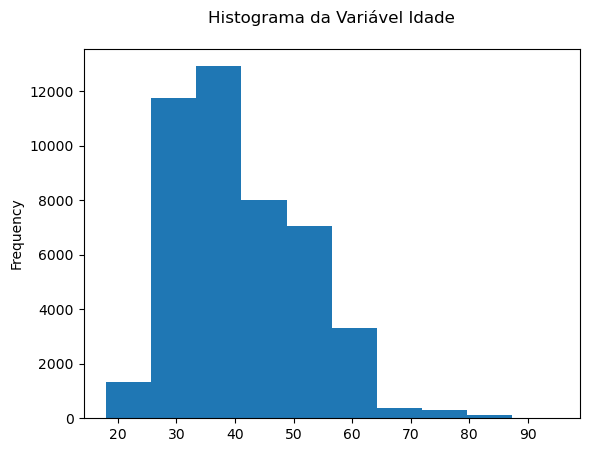

In [43]:
# Histograma
dataset.age.plot(kind='hist')
plt.title('Histograma da Variável Idade\n')
plt.show()

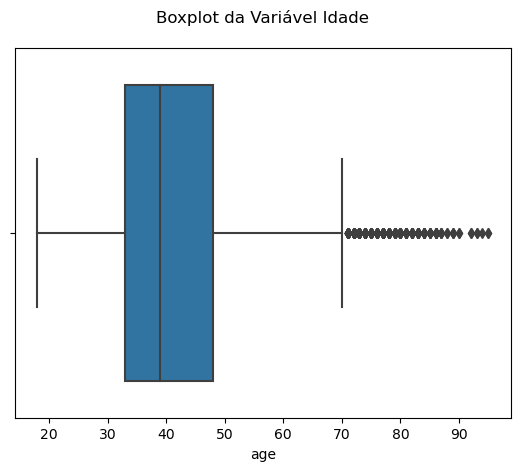

In [48]:
# Boxplot
sns.boxplot(x=dataset['age'], orient='h')
plt.title("Boxplot da Variável Idade\n")
plt.show()

In [49]:
# Vamos verificar qual é a media de idade.
dataset.age.mean()

40.93565090394105

In [50]:
# Vamos verificar a mediana, valor do meio da distribuição quando os dados estão ordenados.
dataset.age.median()

39.0

In [52]:
# Vamos verificar qual é a moda, o valor que mais se repete.
dataset.age.mode()

0    32.0
Name: age, dtype: float64

> Exercício 2: Vamos imputar os valores ausentes da variável age com uma medida de tendência central. Escolha uma das medidas, aplique a imputação e justifique sua escolha. Deixamos a variável como float ou como int? Se convertemos, fazemos isso antes ou depois da imputação?

In [53]:
# Vamos preencher com a MODA, pois são poucos valores ausentes e assim alteramos muito pouco o padrão nos dados.
dataset.age.fillna('32', inplace=True)

In [55]:
# Agora converteremos para int
dataset.age = dataset.age.astype('int')

In [56]:
# Tipo de variável
dataset.age.dtypes

dtype('int32')

In [57]:
# Média
dataset.age.mean()

40.93169803808808

In [61]:
# Mediana
dataset.age.median()

39.0

In [60]:
# Percentual de valores ausentes
dataset.age.isnull().mean()*100

0.0

##### Vamos agora tratar a variável que representa o mês.

In [62]:
# Valores ausentes na variável mês
dataset.month.isnull().sum()

50

In [63]:
# Percentual de valores ausentes
dataset.month.isnull().mean()*100

0.11059255490920351

Como o percentual é menor que 30% não podemos elimiinar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 50 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção, imputação.

In [64]:
# Tipo de variável
dataset.month.dtypes

dtype('O')

In [65]:
# Categorias da variável
dataset.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

>  Exercicio 3: Vamos imputar os valores ausentes da variável month. Escolha uma estratégia e aplique no dataset